In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("maryland_accident_dataset_by_report_no.csv")
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
29588,MCP2526000L,N,Apparently Asleep,No Misuse,Y,Possible Incapacitating Injury,e0715157-51da-4266-bfeb-9dbb80117fba,D,Shoulder/Lap Belt(s),M,40840738-5b3e-4c2f-b56c-430b6e2875a6,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-11-15 15:34:00,28.0
29589,AC2051000K,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Shoulder/Lap Belt(s),M,fbbdb263-5979-4a02-bf49-88a840fd8e2e,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-19 22:40:00,42.0
29590,ADI5630003,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,63529935-542d-4c69-af1f-1b3e49894090,D,Shoulder/Lap Belt(s),M,acfa1fcd-e286-4e64-ba2b-36894375ccc8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,N,Slowing or Stopping,2015-10-22 18:00:00,51.0
29591,HM0146000D,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,400dc255-6c26-4e47-9f75-920439556f0b,D,Shoulder/Lap Belt(s),M,1075765b-229c-478a-8d42-b4d41ec35309,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Y,Moving Constant Speed,2015-11-29 22:45:00,26.0
29592,MCP1519000S,N,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Y,Possible Incapacitating Injury,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Shoulder/Lap Belt(s),M,cec5b365-1040-4898-8943-fa9259c1189c,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-03 02:42:00,45.0


In [3]:
for column in list(df.columns):
    print("\n", column,":\n", df[column].unique())


 REPORT_NO :
 ['AB36760008' 'AC1022000M' 'AC2017000W' ..., 'ADI5630003' 'HM0146000D'
 'MCP1519000S']

 CDL_FLAG :
 ['N' 'Y']

 CONDITION_CODE :
 ['Apparently Normal' 'Had Been Drinking' 'Physical Defects' 'Using Drugs'
 'Other Handicaps' 'Ill' 'Fatigued Fainted' 'Apparently Asleep'
 'Emotional Depressed Angry Disturbed'
 'Influenced by Medications and/or Drugs and/or Alcohol']

 EQUIP_PROB_CODE :
 ['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Not Strapped Right' 'Size/Type Improper' 'Not Anchored Right'
 'Belts/Anchors Broken']

 FAULT_FLAG :
 ['N' 'Y']

 INJ_SEVER_CODE :
 ['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']

 PERSON_ID :
 ['a33f1d87-624c-4608-a11e-84d03ecd067a'
 'a6c44772-fd8f-47d5-95ba-25c143766037'
 '517a3a6f-3d0d-4cda-8e42-836efaf5f55d' ...,
 '63529935-542d-4c69-af1f-1b3e49894090'
 '400dc255-6c26-4e47-9f75-920439556f0b'
 '6dbbc5b4-3922-4726-ae9f-d4140e986ea4']

 PERSON_TY

In [4]:
df.columns

Index(['REPORT_NO', 'CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE',
       'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_ID', 'PERSON_TYPE',
       'SAF_EQUIP_CODE', 'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE',
       'C_M_ZONE_FLAG', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE'],
      dtype='object')

# EDA

In [5]:
person_damage_type = df[['INJ_SEVER_CODE']].groupby(df['INJ_SEVER_CODE']).count()
person_damage_type.rename(columns = {'INJ_SEVER_CODE':'Count'})

,Count
INJ_SEVER_CODE,
Fatal Injury,26
Incapacitating/Disabled Injury,239
No Injury,24451
Non-incapacitating Injury,1751
Possible Incapacitating Injury,3126


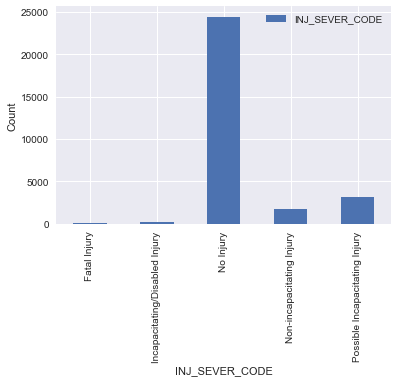

In [6]:
fig1 = person_damage_type.plot.bar()
fig1.set_ylabel("Count")
plt.show()

> Fatal injury, Incapacitating/Disabled Injury를 줄일 수 있는 방안을 찾아보자

In [7]:
vehicle_damage_type = df[['DAMAGE_CODE']].groupby(df['DAMAGE_CODE']).count()
vehicle_damage_type.rename(columns = {'DAMAGE_CODE':'Count'})

,Count
DAMAGE_CODE,
Destroyed,1786
Disabling,12413
Functional,7777
No Damage,742
Superficial,6875


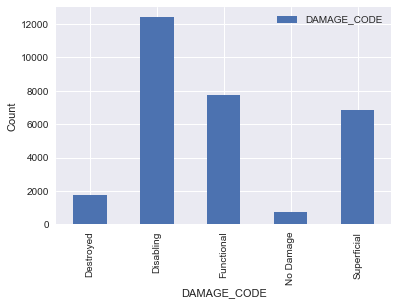

In [8]:
fig2 = vehicle_damage_type.plot.bar()
fig2.set_ylabel("Count")
plt.show()

> 사람의 부상정도와 차량의 파손정도는 다른 양상을 보인다. 차는 크게 파손되었지만 사람은 별로 다치지 않은 경우가 많다. 
물론 현재 데이터에 '운전자' 정보만 들어가 있으므로 보행자 부상 여부는 알 수 없다. 하지만 안전벨트, 차량의 충격 흡수 등에 따라 운전자는 상대적으로 안전하게 보호받는 것을 알 수 있다.

In [9]:
no_injury_df = df[df["INJ_SEVER_CODE"] == "No Injury"]
fatal_df = df[(df["INJ_SEVER_CODE"] == "Fatal Injury")]
disabled_df = df[df["INJ_SEVER_CODE"] == "Incapacitating/Disabled Injury"]
non_incapacitating_df = df[df["INJ_SEVER_CODE"] == "Non-incapacitating Injury"]
possible_df = df[(df["INJ_SEVER_CODE"] == "Possible Incapacitating Injury")]

In [10]:
want_to_visualize = [
 'CONDITION_CODE',
 'EQUIP_PROB_CODE',
 'SAF_EQUIP_CODE',
 'COLLISION_TYPE_CODE',
 'C_M_ZONE_FLAG',
 'JUNCTION_CODE',
 'LANE_CODE',
 'LIGHT_CODE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'SURF_COND_CODE',
 'WEATHER_CODE',
 'AREA_DAMAGED_CODE_MAIN',
 'BODY_TYPE_CODE',
 'DAMAGE_CODE',
 'MOVEMENT_CODE']

for col in want_to_visualize:
    #total_surf_type = df[[col]].groupby(df[col]).count()
    #total_surf_type.plot.bar()
    #plt.title("Total")

    no_injury_surf_type = no_injury_df[[col]].groupby(df[col]).count()
    no_injury_surf_type.plot.bar()
    plt.title("No Injury")

    
    non_incapacitating_surf_type = non_incapacitating_df[[col]].groupby(df[col]).count()
    non_incapacitating_surf_type.plot.bar()
    plt.title("non_incapacitating")

    
    possible_surf_type = possible_df[[col]].groupby(df[col]).count()
    possible_surf_type.plot.bar()
    plt.title("Possible")
    
    
    disabled_surf_type = disabled_df[[col]].groupby(df[col]).count()
    disabled_surf_type.plot.bar()
    plt.title("disabled")
    
    
    fatal_surf_type = fatal_df[[col]].groupby(df[col]).count()
    fatal_surf_type.plot.bar()
    plt.title("Fatal")
    plt.show()
    print("*"*120)
    

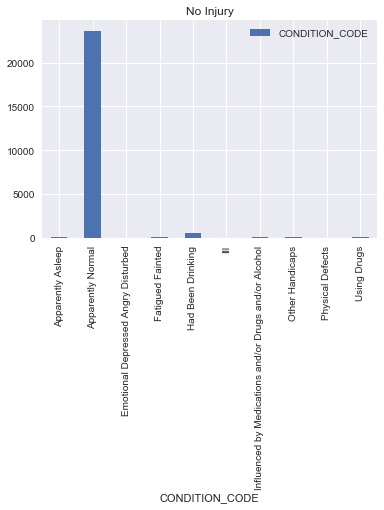

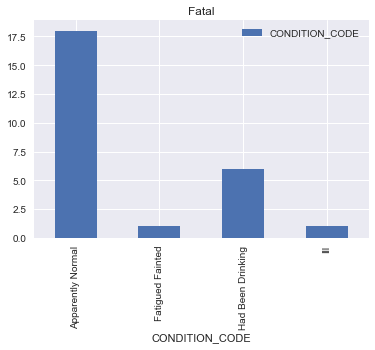

************************************************************************************************************************


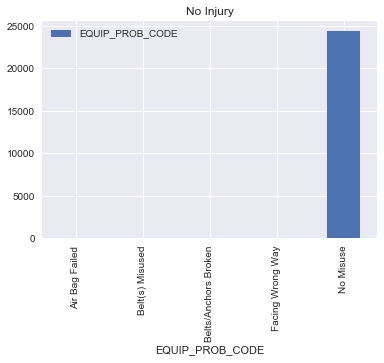

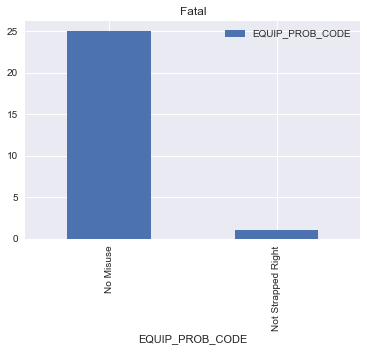

************************************************************************************************************************


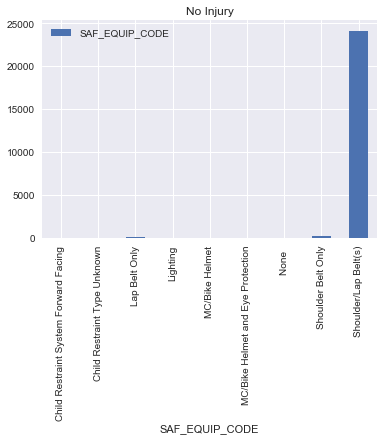

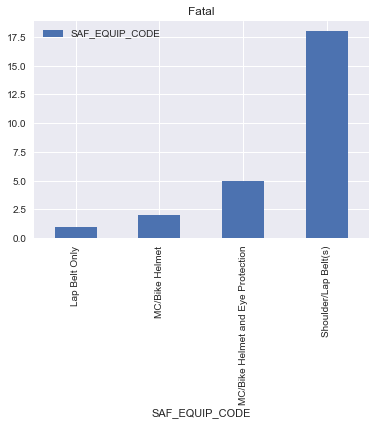

************************************************************************************************************************


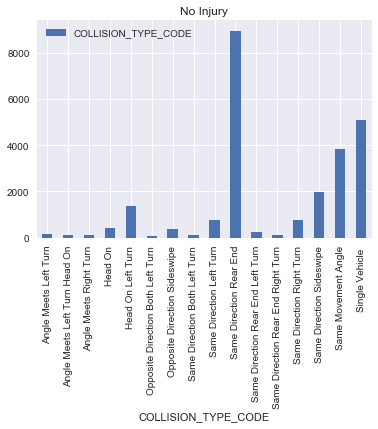

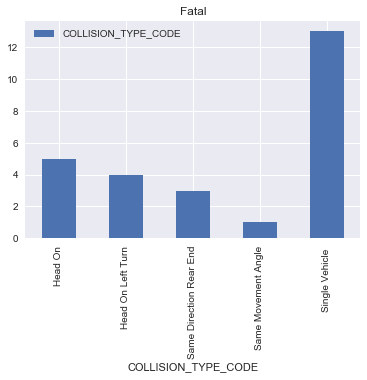

************************************************************************************************************************


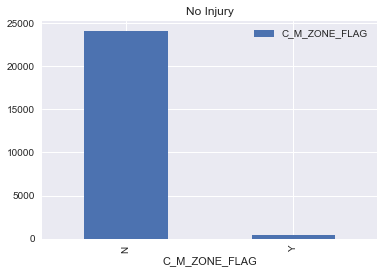

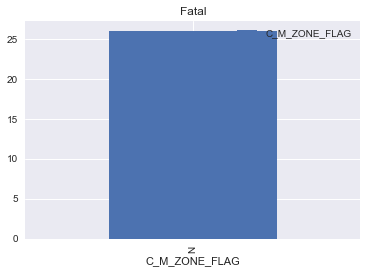

************************************************************************************************************************


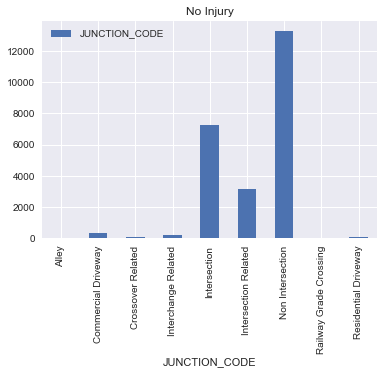

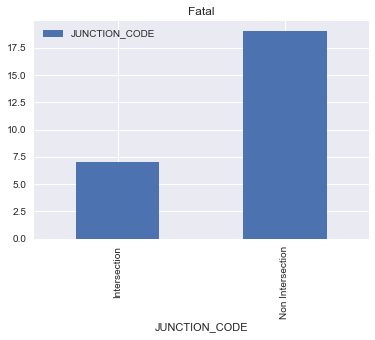

************************************************************************************************************************


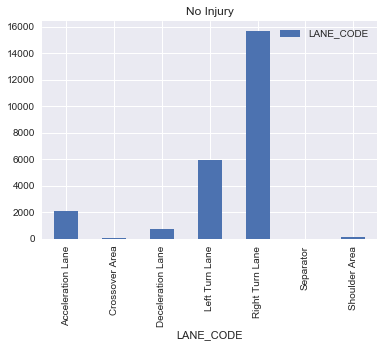

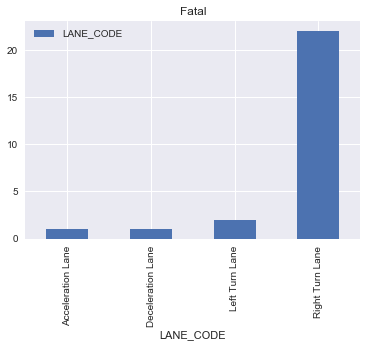

************************************************************************************************************************


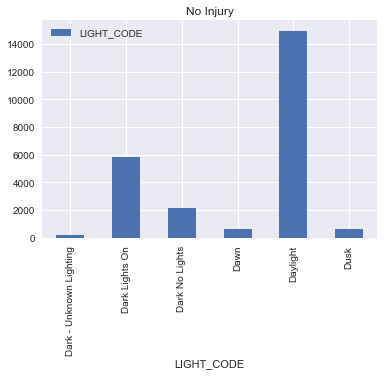

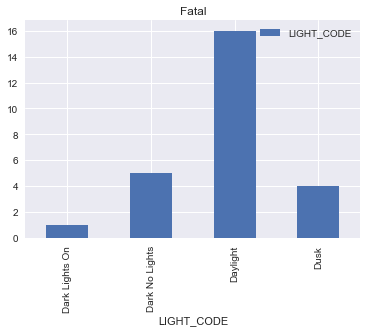

************************************************************************************************************************


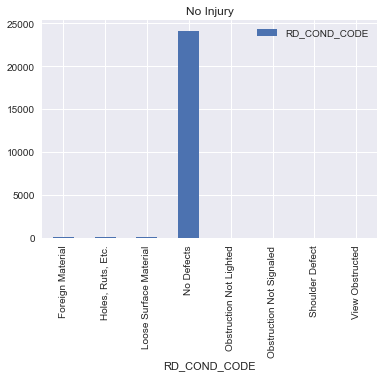

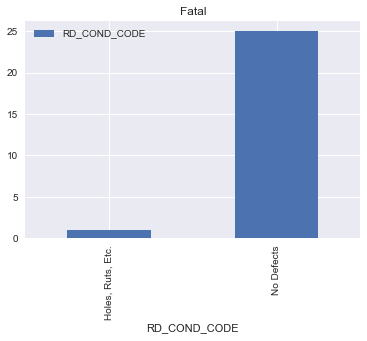

************************************************************************************************************************


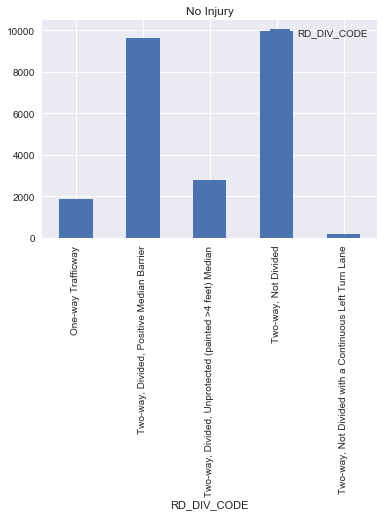

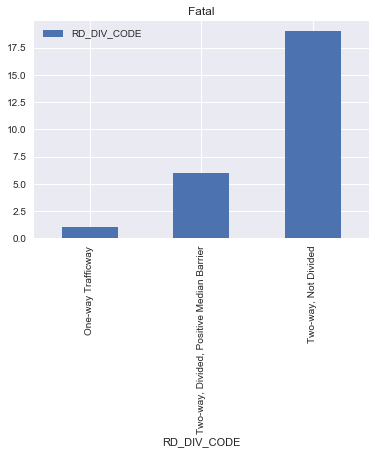

************************************************************************************************************************


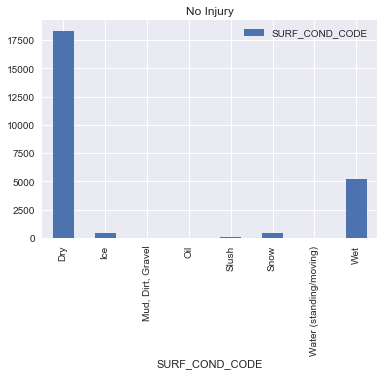

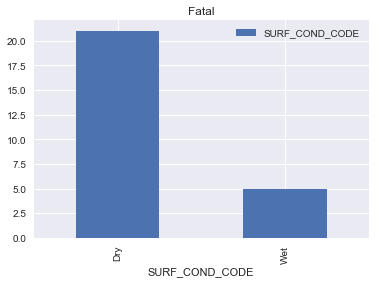

************************************************************************************************************************


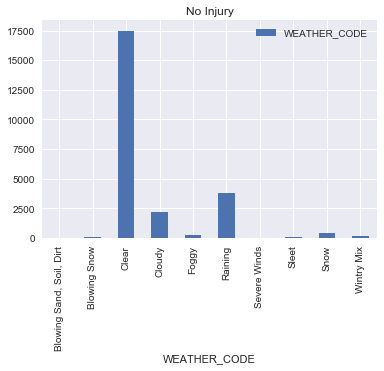

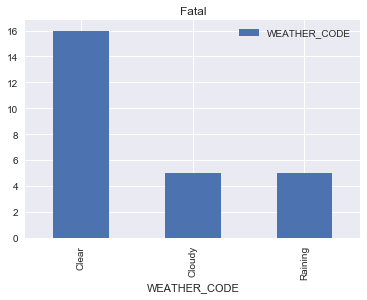

************************************************************************************************************************


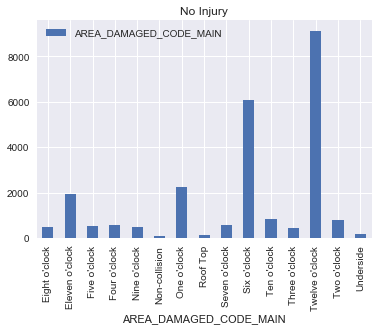

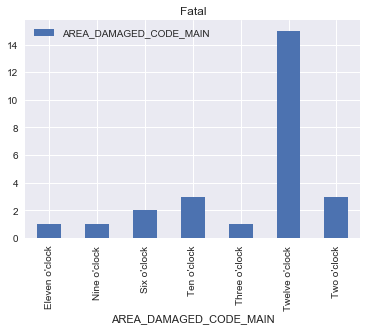

************************************************************************************************************************


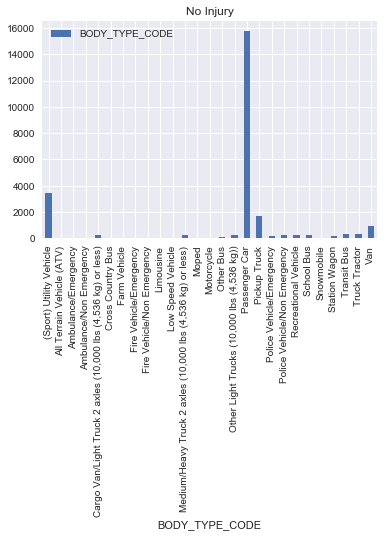

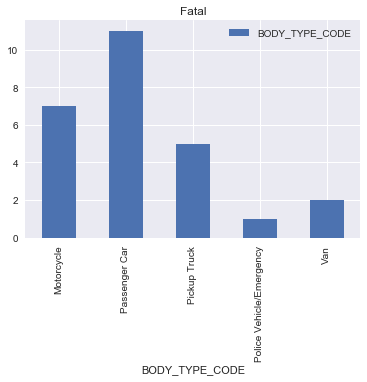

************************************************************************************************************************


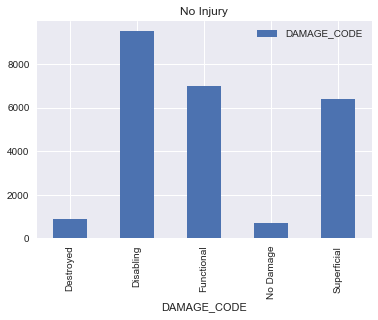

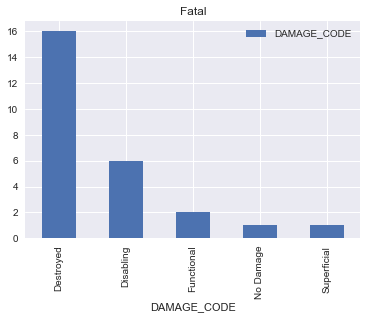

************************************************************************************************************************


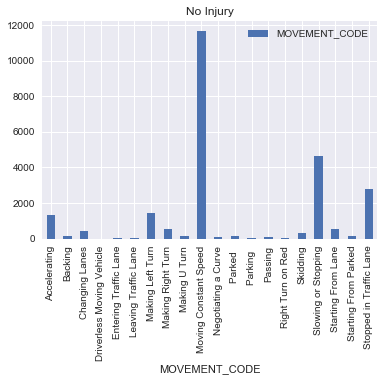

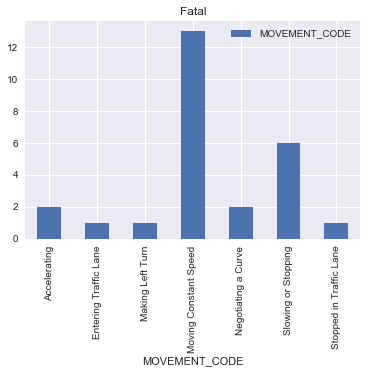

************************************************************************************************************************


In [11]:
for col in want_to_visualize:
    #total_surf_type = df[[col]].groupby(df[col]).count()
    #total_surf_type.plot.bar()
    #plt.title("Total")

    no_injury_surf_type = no_injury_df[[col]].groupby(df[col]).count()
    no_injury_surf_type.plot.bar()
    plt.title("No Injury")

    fatal_surf_type = fatal_df[[col]].groupby(df[col]).count()
    fatal_surf_type.plot.bar()
    plt.title("Fatal")

    #possible_surf_type = possible_df[[col]].groupby(df[col]).count()
    #possible_surf_type.plot.bar()
    #plt.title("Possible")
    plt.show()
    print("*"*120)
    

# 아래의 변수들이 차이를 보이는 것으로 나타남

In [11]:
important = ['CONDITION_CODE', 'INJ_SEVER_CODE', 
       'SAF_EQUIP_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE', 'AGE']


'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'MOVEMENT_CODE'

for col in important:
    #total_surf_type = df[[col]].groupby(df[col]).count()
    #total_surf_type.plot.bar()
    #plt.title("Total")

    no_injury_surf_type = no_injury_df[[col]].groupby(df[col]).count()
    no_injury_surf_type.plot.bar()
    plt.title("No Injury")

    fatal_surf_type = fatal_df[[col]].groupby(df[col]).count()
    fatal_surf_type.plot.bar()
    plt.title("Fatal")

    disabled_surf_type = disabled_df[[col]].groupby(df[col]).count()
    disabled_surf_type.plot.bar()
    plt.title("Disabled")
    plt.show()
    print("*"*120)
    

# Preprocessing

> 분석에 사용할 변수를 선택하는 작업은 자의적이다. 도메인 전문가가 아니므로 보건복지부 자료를 바탕으로 변수를 분류, 선택해보았다.

- 첫번째, 사람에 의한 원인
 - (1) 음주운전
 - (2) 졸음 및 피로운전
 - (3) 기타 요인 (약물복용 중 사고나, 운전 중 기존 질환의 악화나 발생으로 인한 사고)
 - (4) 기타...
 
 
- 두번째, 보호 장구 미착용 요인
 - (1) 안전벨트 착용
 - (2) 에어백
 - (3) 안전의자
 - (4) 헬멧 착용
 - (5) 기타...
 
 
- 세번째, 환경적 요인
 - (1) 날씨
 - (2) 노면상태
 - (3) 기타...

# 비슷한 항목 합치기

# INJ_SEVER_CODE :
 ['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']


In [12]:
inj_type = df["INJ_SEVER_CODE"].copy()

inj_type[df['INJ_SEVER_CODE'] == "No Injury"] = 1
inj_type[df['INJ_SEVER_CODE'] == "Non-incapacitating Injury"] = 3
inj_type[df['INJ_SEVER_CODE'] == "Possible Incapacitating Injury"] = 8
inj_type[df['INJ_SEVER_CODE'] == "Incapacitating/Disabled Injury"] = 15
inj_type[df['INJ_SEVER_CODE'] == "Fatal Injury"] = 30


df['INJ_SEVER_CODE'] = inj_type
df["INJ_SEVER_CODE"].unique()

array([1, 8, 3, 15, 30], dtype=object)

# EQUIP_PROB_CODE :
 ['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Not Strapped Right' 'Size/Type Improper' 'Not Anchored Right'
 'Belts/Anchors Broken']

In [13]:
equip_prob_type = df["EQUIP_PROB_CODE"].copy()
equip_prob_type[df['EQUIP_PROB_CODE'] != "No Misuse"] = "Misuse"

df['EQUIP_PROB_CODE'] = equip_prob_type
df["EQUIP_PROB_CODE"].unique()

array(['No Misuse', 'Misuse'], dtype=object)

## damaged_area

In [14]:
damaged_area = df["AREA_DAMAGED_CODE_MAIN"].copy()

damaged_area[df['AREA_DAMAGED_CODE_MAIN'] == "Six o'clock"] = 'Rear'
damaged_area[(df['AREA_DAMAGED_CODE_MAIN'] == "Twelve o'clock") | (df['AREA_DAMAGED_CODE_MAIN'] == "Eleven o'clock")\
             | (df['AREA_DAMAGED_CODE_MAIN'] == "One o'clock")] = 'Front'

damaged_area[(df['AREA_DAMAGED_CODE_MAIN'] != "Six o'clock") &(df['AREA_DAMAGED_CODE_MAIN'] != "Twelve o'clock") &\
             (df['AREA_DAMAGED_CODE_MAIN'] != "Eleven o'clock") & (df['AREA_DAMAGED_CODE_MAIN'] != "One o'clock")] = 'Side'

df['AREA_DAMAGED_CODE_MAIN'] = damaged_area
df["AREA_DAMAGED_CODE_MAIN"].unique()

array(['Rear', 'Front', 'Side'], dtype=object)

## Condition code

In [15]:
condition_df = df['CONDITION_CODE'].copy()

condition_df[(df['CONDITION_CODE'] == 'Had Been Drinking') | (df['CONDITION_CODE'] == 'Using Drugs')|\
   (df['CONDITION_CODE'] == 'Influenced by Medications and/or Drugs and/or Alcohol')] = "Alchol/Drug"

condition_df[(df['CONDITION_CODE'] == 'Apparently Asleep') | (df['CONDITION_CODE'] == 'Fatigued Fainted')] = "Asleep"
condition_df[(df['CONDITION_CODE'] == 'Physical Defects')] = "Other Handicaps"

df["CONDITION_CODE"] = condition_df
df["CONDITION_CODE"].unique()

array(['Apparently Normal', 'Alchol/Drug', 'Other Handicaps', 'Ill',
       'Asleep', 'Emotional Depressed Angry Disturbed'], dtype=object)

## Equipment code

In [16]:
df['SAF_EQUIP_CODE'].unique()

array(['Shoulder/Lap Belt(s)', 'Shoulder Belt Only', 'Lap Belt Only',
       'None  ', 'Child Restraint System Forward Facing',
       'MC/Bike Helmet and Eye Protection', 'MC/Bike Helmet',
       'MC/Bike Eye Protection Only', 'Lighting',
       'Child Restraint Type Unknown'], dtype=object)

In [17]:
equip_df = df['SAF_EQUIP_CODE'].copy()

equip_df[(df['SAF_EQUIP_CODE'] == 'Shoulder/Lap Belt(s)') | (df['SAF_EQUIP_CODE'] =='Shoulder Belt Only') |\
         (df['SAF_EQUIP_CODE'] =='Lap Belt Only')] = "Belt"

equip_df[(df['SAF_EQUIP_CODE'] == 'Child Restraint System Forward Facing') | \
         (df['SAF_EQUIP_CODE'] =='Child Restraint Type Unknown')] = "Child System"

equip_df[(df['SAF_EQUIP_CODE'] == 'MC/Bike Helmet and Eye Protection') | (df['SAF_EQUIP_CODE'] =='MC/Bike Eye Protection Only') |\
         (df['SAF_EQUIP_CODE'] =='MC/Bike Helmet')] = "MC/Bike"

df['SAF_EQUIP_CODE'] = equip_df
df['SAF_EQUIP_CODE'].unique()

array(['Belt', 'None  ', 'Child System', 'MC/Bike', 'Lighting'], dtype=object)

## COLLISION_TYPE_CODE
 ['Same Direction Rear End Left Turn' 'Same Direction Rear End'
 'Same Direction Sideswipe' 'Opposite Direction Both Left Turn'
 'Opposite Direction Sideswipe' 'Same Movement Angle' 'Head On'
 'Single Vehicle ' 'Same Direction Right Turn' 'Head On Left Turn'
 'Same Direction Left Turn' 'Angle Meets Left Turn'
 'Same Direction Rear End Right Turn' 'Angle Meets Left Turn Head On'
 'Same Direction Both Left Turn' 'Angle Meets Right Turn']

In [18]:
collision_df = df['COLLISION_TYPE_CODE'].copy()

collision_df[(df['COLLISION_TYPE_CODE'] == 'Same Direction Rear End Left Turn') | (df['COLLISION_TYPE_CODE'] =='Same Direction Rear End Right Turn') |\
         (df['COLLISION_TYPE_CODE'] =='Same Direction Rear End')] = "Same Direction Rear End"
collision_df[(df['COLLISION_TYPE_CODE'] == 'Opposite Direction Both Left Turn') | (df['COLLISION_TYPE_CODE'] =='Opposite Direction Sideswipe')] = "Opposite Direction"
collision_df[(df['COLLISION_TYPE_CODE'] == 'Angle Meets Right Turn') | (df['COLLISION_TYPE_CODE'] =='Angle Meets Left Turn Head On')|\
            (df['COLLISION_TYPE_CODE'] =='Angle Meets Left Turn')] = "Angle Meets"
collision_df[(df['COLLISION_TYPE_CODE'] == 'Head On') | (df['COLLISION_TYPE_CODE'] =='Head On Left Turn')] = "Head On"
collision_df[(df['COLLISION_TYPE_CODE'] == 'Same Direction Right Turn') | (df['COLLISION_TYPE_CODE'] =='Same Direction Left Turn')|\
            (df['COLLISION_TYPE_CODE'] =='Same Direction Both Left Turn')] = "Same Direction/Turn"

df['COLLISION_TYPE_CODE'] = collision_df
df['COLLISION_TYPE_CODE'].unique()

array(['Same Direction Rear End', 'Same Direction Sideswipe',
       'Opposite Direction', 'Same Movement Angle', 'Head On',
       'Single Vehicle ', 'Same Direction/Turn', 'Angle Meets'], dtype=object)

### BODY_TYPE_CODE 
 ['Passenger Car' '(Sport) Utility Vehicle' 'Pickup Truck'
 'Other Light Trucks (10,000 lbs (4,536 kg))' 'Van' 'Other Bus'
 'School Bus' 'Snowmobile' 'Station Wagon'
 'Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)'
 'All Terrain Vehicle (ATV)' 'Police Vehicle/Non Emergency'
 'Police Vehicle/Emergency' 'Transit Bus'
 'Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)'
 'Recreational Vehicle' 'Ambulance/Non Emergency' 'Low Speed Vehicle'
 'Ambulance/Emergency' 'Truck Tractor' 'Fire Vehicle/Emergency'
 'Farm Vehicle' 'Motorcycle' 'Fire Vehicle/Non Emergency' 'Limousine'
 'Moped' 'Cross Country Bus']

In [19]:
body_df = df['BODY_TYPE_CODE'].copy()

body_df[(df['BODY_TYPE_CODE'] == '(Sport) Utility Vehicle') | (df['BODY_TYPE_CODE'] == 'Van')| (df['BODY_TYPE_CODE'] == 'Limousine')|\
       (df['BODY_TYPE_CODE'] == 'Station Wagon')] = "Passenger Car"
body_df[(df['BODY_TYPE_CODE'] == 'Pickup Truck') | (df['BODY_TYPE_CODE'] =='Other Light Trucks (10,000 lbs (4,536 kg))' ) |\
         (df['BODY_TYPE_CODE'] =='Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)' )|\
        (df['BODY_TYPE_CODE'] =='Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)')] = "Truck"
body_df[(df['BODY_TYPE_CODE'] == 'Other Bus') | (df['BODY_TYPE_CODE'] =='School Bus' ) |\
         (df['BODY_TYPE_CODE'] =='Transit Bus' )|(df['BODY_TYPE_CODE'] =='Cross Country Bus' )|\
        (df['BODY_TYPE_CODE'] =='Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)')] = "Bus"
body_df[(df['BODY_TYPE_CODE'] == 'Police Vehicle/Emergency') | (df['BODY_TYPE_CODE'] =='Ambulance/Emergency' ) |\
         (df['BODY_TYPE_CODE'] =='Fire Vehicle/Emergency' )] = "Special/Emergency"
body_df[(df['BODY_TYPE_CODE'] == 'Police Vehicle/Non Emergency') | (df['BODY_TYPE_CODE'] =='Ambulance/Non Emergency' ) |\
         (df['BODY_TYPE_CODE'] =='Fire Vehicle/Non Emergency' )] = "Special/Non Emergency"
body_df[(df['BODY_TYPE_CODE'] == 'All Terrain Vehicle (ATV)') | (df['BODY_TYPE_CODE'] =='Recreational Vehicle' ) |\
         (df['BODY_TYPE_CODE'] =='Low Speed Vehicle' )|(df['BODY_TYPE_CODE'] =='Snowmobile' )] = "Recreational"
body_df[(df['BODY_TYPE_CODE'] == 'Motorcycle') | (df['BODY_TYPE_CODE'] =='Moped' )] = "Motorcycle"
body_df[(df['BODY_TYPE_CODE'] == 'Truck Tractor') | (df['BODY_TYPE_CODE'] =='Farm Vehicle' )] = "Farm"

df['BODY_TYPE_CODE'] = body_df
df['BODY_TYPE_CODE'].unique()

array(['Passenger Car', 'Truck', 'Bus', 'Recreational',
       'Special/Non Emergency', 'Special/Emergency', 'Farm', 'Motorcycle'], dtype=object)

# SURF_COND_CODE :
 ['Wet' 'Dry' 'Ice' 'Snow' 'Oil' 'Slush' 'Mud, Dirt, Gravel'
 'Water (standing/moving)' 'Sand']

In [20]:
surf_df = df['SURF_COND_CODE'].copy()

surf_df[(df['SURF_COND_CODE'] == 'Ice') | (df['SURF_COND_CODE'] =='Slush') |\
         (df['SURF_COND_CODE'] =='Snow')] = "Winter"
surf_df[(df['SURF_COND_CODE'] == 'Water (standing/moving)')] = "Wet"
surf_df[(df['SURF_COND_CODE'] == 'Oil') | (df['SURF_COND_CODE'] =='Mud, Dirt, Gravel') |\
         (df['SURF_COND_CODE'] =='Sand')] = "Others"
df['SURF_COND_CODE'] = surf_df
df['SURF_COND_CODE'].unique()

array(['Wet', 'Dry', 'Winter', 'Others'], dtype=object)

# WEATHER_CODE :
 ['Raining' 'Clear' 'Wintry Mix' 'Snow' 'Sleet' 'Cloudy' 'Severe Winds'
 'Blowing Snow' 'Foggy' 'Blowing Sand, Soil, Dirt']

In [21]:
weather_df = df['WEATHER_CODE'].copy()

weather_df[(df['WEATHER_CODE'] == 'Sleet')|(df['WEATHER_CODE'] == 'Blowing Snow')|(df['WEATHER_CODE'] == 'Wintry Mix')] = "Snow"
weather_df[(df['WEATHER_CODE'] == 'Cloudy')] = "Clear"
df['WEATHER_CODE'] = weather_df
df['WEATHER_CODE'].unique()

array(['Raining', 'Clear', 'Snow', 'Severe Winds', 'Foggy',
       'Blowing Sand, Soil, Dirt'], dtype=object)

### convert hour

In [22]:
from datetime import datetime

convert_hour = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour
df['TIME'] = df["TIME"].apply(convert_hour)

### classify time period

In [23]:
time_period = df["TIME"].copy()

time_period[(0<=df['TIME']) & (df['TIME']<6)] = 'DAWN'
time_period[(6<=df['TIME']) & (df['TIME']<12)] = 'MORNING'
time_period[(12<=df['TIME']) & (df['TIME']<18)] = 'AFTERNOON'
time_period[(18<=df['TIME'])] = 'EVENING'
df['TIME_PERIOD'] = time_period
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE,TIME_PERIOD
29588,MCP2526000L,N,Asleep,No Misuse,Y,8,e0715157-51da-4266-bfeb-9dbb80117fba,D,Belt,M,40840738-5b3e-4c2f-b56c-430b6e2875a6,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,15,28.0,AFTERNOON
29589,AC2051000K,N,Alchol/Drug,No Misuse,Y,1,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Belt,M,fbbdb263-5979-4a02-bf49-88a840fd8e2e,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,22,42.0,EVENING
29590,ADI5630003,N,Alchol/Drug,No Misuse,Y,1,63529935-542d-4c69-af1f-1b3e49894090,D,Belt,M,acfa1fcd-e286-4e64-ba2b-36894375ccc8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Superficial,N,Slowing or Stopping,18,51.0,EVENING
29591,HM0146000D,N,Alchol/Drug,No Misuse,Y,1,400dc255-6c26-4e47-9f75-920439556f0b,D,Belt,M,1075765b-229c-478a-8d42-b4d41ec35309,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided",Others,Clear,Front,Passenger Car,Disabling,Y,Moving Constant Speed,22,26.0,EVENING
29592,MCP1519000S,N,Alchol/Drug,Misuse,Y,8,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Belt,M,cec5b365-1040-4898-8943-fa9259c1189c,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,2,45.0,DAWN


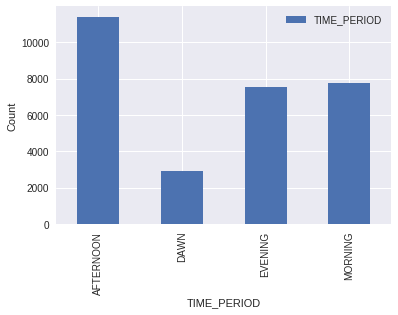

In [24]:
counts_per_time_period = df[['TIME_PERIOD']].groupby(df['TIME_PERIOD']).count()
fig3 = counts_per_time_period.plot.bar()
fig3.set_ylabel("Count")
plt.show()

In [25]:
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE,TIME_PERIOD
29588,MCP2526000L,N,Asleep,No Misuse,Y,8,e0715157-51da-4266-bfeb-9dbb80117fba,D,Belt,M,40840738-5b3e-4c2f-b56c-430b6e2875a6,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,15,28.0,AFTERNOON
29589,AC2051000K,N,Alchol/Drug,No Misuse,Y,1,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Belt,M,fbbdb263-5979-4a02-bf49-88a840fd8e2e,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,22,42.0,EVENING
29590,ADI5630003,N,Alchol/Drug,No Misuse,Y,1,63529935-542d-4c69-af1f-1b3e49894090,D,Belt,M,acfa1fcd-e286-4e64-ba2b-36894375ccc8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Superficial,N,Slowing or Stopping,18,51.0,EVENING
29591,HM0146000D,N,Alchol/Drug,No Misuse,Y,1,400dc255-6c26-4e47-9f75-920439556f0b,D,Belt,M,1075765b-229c-478a-8d42-b4d41ec35309,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided",Others,Clear,Front,Passenger Car,Disabling,Y,Moving Constant Speed,22,26.0,EVENING
29592,MCP1519000S,N,Alchol/Drug,Misuse,Y,8,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Belt,M,cec5b365-1040-4898-8943-fa9259c1189c,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Disabling,N,Moving Constant Speed,2,45.0,DAWN


# drop cols

In [26]:
df.columns

Index(['REPORT_NO', 'CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE',
       'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_ID', 'PERSON_TYPE',
       'SAF_EQUIP_CODE', 'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE',
       'C_M_ZONE_FLAG', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE', 'TIME_PERIOD'],
      dtype='object')

In [27]:
want_to_drop_cols = ['INJ_SEVER_CODE','DAMAGE_CODE', 'REPORT_NO', 'CDL_FLAG','PERSON_ID', 'PERSON_TYPE', 'FAULT_FLAG','SEX_CODE', 'VEHICLE_ID','C_M_ZONE_FLAG','HIT_AND_RUN_FLAG', 'TIME']
df = df.drop(want_to_drop_cols, axis = 1)
df.columns

Index(['CONDITION_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE',
       'COLLISION_TYPE_CODE', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'MOVEMENT_CODE', 'AGE',
       'TIME_PERIOD'],
      dtype='object')

In [28]:
#appropriate_df = df.drop(want_to_drop_cols, axis = 1)

appropriate_df = df.copy()
appropriate_df.tail()

,CONDITION_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,COLLISION_TYPE_CODE,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,MOVEMENT_CODE,AGE,TIME_PERIOD
29588,Asleep,No Misuse,Belt,Single Vehicle,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,Front,Passenger Car,Moving Constant Speed,28.0,AFTERNOON
29589,Alchol/Drug,No Misuse,Belt,Single Vehicle,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,Front,Passenger Car,Moving Constant Speed,42.0,EVENING
29590,Alchol/Drug,No Misuse,Belt,Same Direction Rear End,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Slowing or Stopping,51.0,EVENING
29591,Alchol/Drug,No Misuse,Belt,Single Vehicle,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided",Others,Clear,Front,Passenger Car,Moving Constant Speed,26.0,EVENING
29592,Alchol/Drug,Misuse,Belt,Single Vehicle,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Front,Passenger Car,Moving Constant Speed,45.0,DAWN


In [29]:
want_to_dummify_cols = []
for col in list(appropriate_df.columns):
    if (not col == "AGE") and (not col == "INJ_SEVER_CODE"):
        want_to_dummify_cols.append(col)

dummified_df = pd.get_dummies(appropriate_df, columns = want_to_dummify_cols)
dummified_df.tail()

,AGE,CONDITION_CODE_Alchol/Drug,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Ill,CONDITION_CODE_Other Handicaps,EQUIP_PROB_CODE_Misuse,EQUIP_PROB_CODE_No Misuse,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Child System,SAF_EQUIP_CODE_Lighting,SAF_EQUIP_CODE_MC/Bike,SAF_EQUIP_CODE_None,COLLISION_TYPE_CODE_Angle Meets,COLLISION_TYPE_CODE_Head On,COLLISION_TYPE_CODE_Opposite Direction,COLLISION_TYPE_CODE_Same Direction Rear End,COLLISION_TYPE_CODE_Same Direction Sideswipe,COLLISION_TYPE_CODE_Same Direction/Turn,COLLISION_TYPE_CODE_Same Movement Angle,COLLISION_TYPE_CODE_Single Vehicle,JUNCTION_CODE_Alley,JUNCTION_CODE_Commercial Driveway,JUNCTION_CODE_Crossover Related,JUNCTION_CODE_Interchange Related,JUNCTION_CODE_Intersection,JUNCTION_CODE_Intersection Related,JUNCTION_CODE_Non Intersection,JUNCTION_CODE_Railway Grade Crossing,JUNCTION_CODE_Residential Driveway,LANE_CODE_Acceleration Lane,LANE_CODE_Crossover Area,LANE_CODE_Deceleration Lane,LANE_CODE_Left Turn Lane,LANE_CODE_Right Turn Lane,LANE_CODE_Separator,LANE_CODE_Shoulder Area,LIGHT_CODE_Dark - Unknown Lighting,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Dawn,LIGHT_CODE_Daylight,LIGHT_CODE_Dusk,RD_COND_CODE_Foreign Material,"RD_COND_CODE_Holes, Ruts, Etc.",RD_COND_CODE_Loose Surface Material,RD_COND_CODE_No Defects,RD_COND_CODE_Obstruction Not Lighted,RD_COND_CODE_Obstruction Not Signaled,RD_COND_CODE_Shoulder Defect,RD_COND_CODE_View Obstructed,RD_DIV_CODE_One-way Trafficway,"RD_DIV_CODE_Two-way, Divided, Positive Median Barrier","RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median","RD_DIV_CODE_Two-way, Not Divided","RD_DIV_CODE_Two-way, Not Divided with a Continuous Left Turn Lane",SURF_COND_CODE_Dry,SURF_COND_CODE_Others,SURF_COND_CODE_Wet,SURF_COND_CODE_Winter,"WEATHER_CODE_Blowing Sand, Soil, Dirt",WEATHER_CODE_Clear,WEATHER_CODE_Foggy,WEATHER_CODE_Raining,WEATHER_CODE_Severe Winds,WEATHER_CODE_Snow,AREA_DAMAGED_CODE_MAIN_Front,AREA_DAMAGED_CODE_MAIN_Rear,AREA_DAMAGED_CODE_MAIN_Side,BODY_TYPE_CODE_Bus,BODY_TYPE_CODE_Farm,BODY_TYPE_CODE_Motorcycle,BODY_TYPE_CODE_Passenger Car,BODY_TYPE_CODE_Recreational,BODY_TYPE_CODE_Special/Emergency,BODY_TYPE_CODE_Special/Non Emergency,BODY_TYPE_CODE_Truck,MOVEMENT_CODE_Accelerating,MOVEMENT_CODE_Backing,MOVEMENT_CODE_Changing Lanes,MOVEMENT_CODE_Driverless Moving Vehicle,MOVEMENT_CODE_Entering Traffic Lane,MOVEMENT_CODE_Leaving Traffic Lane,MOVEMENT_CODE_Making Left Turn,MOVEMENT_CODE_Making Right Turn,MOVEMENT_CODE_Making U Turn,MOVEMENT_CODE_Moving Constant Speed,MOVEMENT_CODE_Negotiating a Curve,MOVEMENT_CODE_Parked,MOVEMENT_CODE_Parking,MOVEMENT_CODE_Passing,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,28.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29589,42.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29590,51.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
29591,26.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29592,45.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

In [30]:
#want_to_scale_cols = ["AGE", "INJ_SEVER_CODE"]
scaled_df = dummified_df.copy()
scaled_df["AGE"] = (scaled_df["AGE"].mean() - scaled_df["AGE"])/scaled_df["AGE"].std()
#scaled_df["INJ_SEVER_CODE"] = (scaled_df["INJ_SEVER_CODE"].mean() - scaled_df["INJ_SEVER_CODE"])/scaled_df["INJ_SEVER_CODE"].std()

In [31]:
scaled_df.tail()

,AGE,CONDITION_CODE_Alchol/Drug,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Ill,CONDITION_CODE_Other Handicaps,EQUIP_PROB_CODE_Misuse,EQUIP_PROB_CODE_No Misuse,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Child System,SAF_EQUIP_CODE_Lighting,SAF_EQUIP_CODE_MC/Bike,SAF_EQUIP_CODE_None,COLLISION_TYPE_CODE_Angle Meets,COLLISION_TYPE_CODE_Head On,COLLISION_TYPE_CODE_Opposite Direction,COLLISION_TYPE_CODE_Same Direction Rear End,COLLISION_TYPE_CODE_Same Direction Sideswipe,COLLISION_TYPE_CODE_Same Direction/Turn,COLLISION_TYPE_CODE_Same Movement Angle,COLLISION_TYPE_CODE_Single Vehicle,JUNCTION_CODE_Alley,JUNCTION_CODE_Commercial Driveway,JUNCTION_CODE_Crossover Related,JUNCTION_CODE_Interchange Related,JUNCTION_CODE_Intersection,JUNCTION_CODE_Intersection Related,JUNCTION_CODE_Non Intersection,JUNCTION_CODE_Railway Grade Crossing,JUNCTION_CODE_Residential Driveway,LANE_CODE_Acceleration Lane,LANE_CODE_Crossover Area,LANE_CODE_Deceleration Lane,LANE_CODE_Left Turn Lane,LANE_CODE_Right Turn Lane,LANE_CODE_Separator,LANE_CODE_Shoulder Area,LIGHT_CODE_Dark - Unknown Lighting,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Dawn,LIGHT_CODE_Daylight,LIGHT_CODE_Dusk,RD_COND_CODE_Foreign Material,"RD_COND_CODE_Holes, Ruts, Etc.",RD_COND_CODE_Loose Surface Material,RD_COND_CODE_No Defects,RD_COND_CODE_Obstruction Not Lighted,RD_COND_CODE_Obstruction Not Signaled,RD_COND_CODE_Shoulder Defect,RD_COND_CODE_View Obstructed,RD_DIV_CODE_One-way Trafficway,"RD_DIV_CODE_Two-way, Divided, Positive Median Barrier","RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median","RD_DIV_CODE_Two-way, Not Divided","RD_DIV_CODE_Two-way, Not Divided with a Continuous Left Turn Lane",SURF_COND_CODE_Dry,SURF_COND_CODE_Others,SURF_COND_CODE_Wet,SURF_COND_CODE_Winter,"WEATHER_CODE_Blowing Sand, Soil, Dirt",WEATHER_CODE_Clear,WEATHER_CODE_Foggy,WEATHER_CODE_Raining,WEATHER_CODE_Severe Winds,WEATHER_CODE_Snow,AREA_DAMAGED_CODE_MAIN_Front,AREA_DAMAGED_CODE_MAIN_Rear,AREA_DAMAGED_CODE_MAIN_Side,BODY_TYPE_CODE_Bus,BODY_TYPE_CODE_Farm,BODY_TYPE_CODE_Motorcycle,BODY_TYPE_CODE_Passenger Car,BODY_TYPE_CODE_Recreational,BODY_TYPE_CODE_Special/Emergency,BODY_TYPE_CODE_Special/Non Emergency,BODY_TYPE_CODE_Truck,MOVEMENT_CODE_Accelerating,MOVEMENT_CODE_Backing,MOVEMENT_CODE_Changing Lanes,MOVEMENT_CODE_Driverless Moving Vehicle,MOVEMENT_CODE_Entering Traffic Lane,MOVEMENT_CODE_Leaving Traffic Lane,MOVEMENT_CODE_Making Left Turn,MOVEMENT_CODE_Making Right Turn,MOVEMENT_CODE_Making U Turn,MOVEMENT_CODE_Moving Constant Speed,MOVEMENT_CODE_Negotiating a Curve,MOVEMENT_CODE_Parked,MOVEMENT_CODE_Parking,MOVEMENT_CODE_Passing,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,0.771133,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29589,-0.109788,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29590,-0.676095,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
29591,0.896979,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29592,-0.298557,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,

In [32]:
scaled_df.columns

Index(['AGE', 'CONDITION_CODE_Alchol/Drug', 'CONDITION_CODE_Apparently Normal',
       'CONDITION_CODE_Asleep',
       'CONDITION_CODE_Emotional Depressed Angry Disturbed',
       'CONDITION_CODE_Ill', 'CONDITION_CODE_Other Handicaps',
       'EQUIP_PROB_CODE_Misuse', 'EQUIP_PROB_CODE_No Misuse',
       'SAF_EQUIP_CODE_Belt',
       ...
       'MOVEMENT_CODE_Right Turn on Red', 'MOVEMENT_CODE_Skidding',
       'MOVEMENT_CODE_Slowing or Stopping', 'MOVEMENT_CODE_Starting From Lane',
       'MOVEMENT_CODE_Starting From Parked',
       'MOVEMENT_CODE_Stopped in Traffic Lane', 'TIME_PERIOD_AFTERNOON',
       'TIME_PERIOD_DAWN', 'TIME_PERIOD_EVENING', 'TIME_PERIOD_MORNING'],
      dtype='object', length=102)

# Analysis

In [33]:
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [34]:
z = linkage(scaled_df, 'ward')

In [35]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

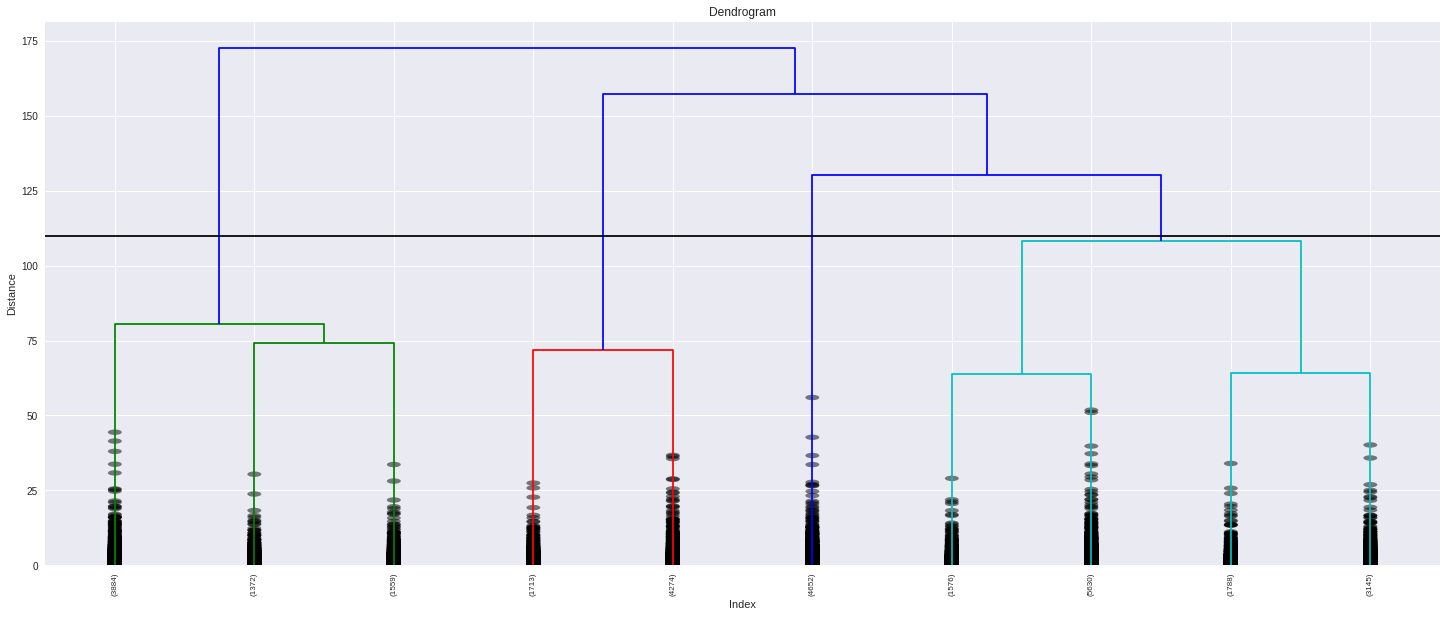

In [36]:
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 10, max_d = 110)

In [111]:
from scipy.cluster.hierarchy import fcluster
#120
predicted_labels = fcluster(z, 120, criterion = 'distance') 
predicted_labels # 0부터가 아니라 1부터 시작함. sklearn과 다름
set(predicted_labels)

{1, 2, 3, 4}

In [112]:
result_df = scaled_df.copy()
result_df['scipy_hc_labels'] = predicted_labels
result_df.tail()

,AGE,CONDITION_CODE_Alchol/Drug,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Ill,CONDITION_CODE_Other Handicaps,EQUIP_PROB_CODE_Misuse,EQUIP_PROB_CODE_No Misuse,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Child System,SAF_EQUIP_CODE_Lighting,SAF_EQUIP_CODE_MC/Bike,SAF_EQUIP_CODE_None,COLLISION_TYPE_CODE_Angle Meets,COLLISION_TYPE_CODE_Head On,COLLISION_TYPE_CODE_Opposite Direction,COLLISION_TYPE_CODE_Same Direction Rear End,COLLISION_TYPE_CODE_Same Direction Sideswipe,COLLISION_TYPE_CODE_Same Direction/Turn,COLLISION_TYPE_CODE_Same Movement Angle,COLLISION_TYPE_CODE_Single Vehicle,JUNCTION_CODE_Alley,JUNCTION_CODE_Commercial Driveway,JUNCTION_CODE_Crossover Related,JUNCTION_CODE_Interchange Related,JUNCTION_CODE_Intersection,JUNCTION_CODE_Intersection Related,JUNCTION_CODE_Non Intersection,JUNCTION_CODE_Railway Grade Crossing,JUNCTION_CODE_Residential Driveway,LANE_CODE_Acceleration Lane,LANE_CODE_Crossover Area,LANE_CODE_Deceleration Lane,LANE_CODE_Left Turn Lane,LANE_CODE_Right Turn Lane,LANE_CODE_Separator,LANE_CODE_Shoulder Area,LIGHT_CODE_Dark - Unknown Lighting,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Dawn,LIGHT_CODE_Daylight,LIGHT_CODE_Dusk,RD_COND_CODE_Foreign Material,"RD_COND_CODE_Holes, Ruts, Etc.",RD_COND_CODE_Loose Surface Material,RD_COND_CODE_No Defects,RD_COND_CODE_Obstruction Not Lighted,RD_COND_CODE_Obstruction Not Signaled,RD_COND_CODE_Shoulder Defect,RD_COND_CODE_View Obstructed,RD_DIV_CODE_One-way Trafficway,"RD_DIV_CODE_Two-way, Divided, Positive Median Barrier","RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median","RD_DIV_CODE_Two-way, Not Divided","RD_DIV_CODE_Two-way, Not Divided with a Continuous Left Turn Lane",SURF_COND_CODE_Dry,SURF_COND_CODE_Others,SURF_COND_CODE_Wet,SURF_COND_CODE_Winter,"WEATHER_CODE_Blowing Sand, Soil, Dirt",WEATHER_CODE_Clear,WEATHER_CODE_Foggy,WEATHER_CODE_Raining,WEATHER_CODE_Severe Winds,WEATHER_CODE_Snow,AREA_DAMAGED_CODE_MAIN_Front,AREA_DAMAGED_CODE_MAIN_Rear,AREA_DAMAGED_CODE_MAIN_Side,BODY_TYPE_CODE_Bus,BODY_TYPE_CODE_Farm,BODY_TYPE_CODE_Motorcycle,BODY_TYPE_CODE_Passenger Car,BODY_TYPE_CODE_Recreational,BODY_TYPE_CODE_Special/Emergency,BODY_TYPE_CODE_Special/Non Emergency,BODY_TYPE_CODE_Truck,MOVEMENT_CODE_Accelerating,MOVEMENT_CODE_Backing,MOVEMENT_CODE_Changing Lanes,MOVEMENT_CODE_Driverless Moving Vehicle,MOVEMENT_CODE_Entering Traffic Lane,MOVEMENT_CODE_Leaving Traffic Lane,MOVEMENT_CODE_Making Left Turn,MOVEMENT_CODE_Making Right Turn,MOVEMENT_CODE_Making U Turn,MOVEMENT_CODE_Moving Constant Speed,MOVEMENT_CODE_Negotiating a Curve,MOVEMENT_CODE_Parked,MOVEMENT_CODE_Parking,MOVEMENT_CODE_Passing,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,0.771133,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
29589,-0.109788,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29590,-0.676095,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
29591,0.896979,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29592,-0.298557,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,

In [113]:
component_check_df = result_df.copy()
component_check_df["AGE"] = df["AGE"]
component_check_df.tail()

,AGE,CONDITION_CODE_Alchol/Drug,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Ill,CONDITION_CODE_Other Handicaps,EQUIP_PROB_CODE_Misuse,EQUIP_PROB_CODE_No Misuse,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Child System,SAF_EQUIP_CODE_Lighting,SAF_EQUIP_CODE_MC/Bike,SAF_EQUIP_CODE_None,COLLISION_TYPE_CODE_Angle Meets,COLLISION_TYPE_CODE_Head On,COLLISION_TYPE_CODE_Opposite Direction,COLLISION_TYPE_CODE_Same Direction Rear End,COLLISION_TYPE_CODE_Same Direction Sideswipe,COLLISION_TYPE_CODE_Same Direction/Turn,COLLISION_TYPE_CODE_Same Movement Angle,COLLISION_TYPE_CODE_Single Vehicle,JUNCTION_CODE_Alley,JUNCTION_CODE_Commercial Driveway,JUNCTION_CODE_Crossover Related,JUNCTION_CODE_Interchange Related,JUNCTION_CODE_Intersection,JUNCTION_CODE_Intersection Related,JUNCTION_CODE_Non Intersection,JUNCTION_CODE_Railway Grade Crossing,JUNCTION_CODE_Residential Driveway,LANE_CODE_Acceleration Lane,LANE_CODE_Crossover Area,LANE_CODE_Deceleration Lane,LANE_CODE_Left Turn Lane,LANE_CODE_Right Turn Lane,LANE_CODE_Separator,LANE_CODE_Shoulder Area,LIGHT_CODE_Dark - Unknown Lighting,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Dawn,LIGHT_CODE_Daylight,LIGHT_CODE_Dusk,RD_COND_CODE_Foreign Material,"RD_COND_CODE_Holes, Ruts, Etc.",RD_COND_CODE_Loose Surface Material,RD_COND_CODE_No Defects,RD_COND_CODE_Obstruction Not Lighted,RD_COND_CODE_Obstruction Not Signaled,RD_COND_CODE_Shoulder Defect,RD_COND_CODE_View Obstructed,RD_DIV_CODE_One-way Trafficway,"RD_DIV_CODE_Two-way, Divided, Positive Median Barrier","RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median","RD_DIV_CODE_Two-way, Not Divided","RD_DIV_CODE_Two-way, Not Divided with a Continuous Left Turn Lane",SURF_COND_CODE_Dry,SURF_COND_CODE_Others,SURF_COND_CODE_Wet,SURF_COND_CODE_Winter,"WEATHER_CODE_Blowing Sand, Soil, Dirt",WEATHER_CODE_Clear,WEATHER_CODE_Foggy,WEATHER_CODE_Raining,WEATHER_CODE_Severe Winds,WEATHER_CODE_Snow,AREA_DAMAGED_CODE_MAIN_Front,AREA_DAMAGED_CODE_MAIN_Rear,AREA_DAMAGED_CODE_MAIN_Side,BODY_TYPE_CODE_Bus,BODY_TYPE_CODE_Farm,BODY_TYPE_CODE_Motorcycle,BODY_TYPE_CODE_Passenger Car,BODY_TYPE_CODE_Recreational,BODY_TYPE_CODE_Special/Emergency,BODY_TYPE_CODE_Special/Non Emergency,BODY_TYPE_CODE_Truck,MOVEMENT_CODE_Accelerating,MOVEMENT_CODE_Backing,MOVEMENT_CODE_Changing Lanes,MOVEMENT_CODE_Driverless Moving Vehicle,MOVEMENT_CODE_Entering Traffic Lane,MOVEMENT_CODE_Leaving Traffic Lane,MOVEMENT_CODE_Making Left Turn,MOVEMENT_CODE_Making Right Turn,MOVEMENT_CODE_Making U Turn,MOVEMENT_CODE_Moving Constant Speed,MOVEMENT_CODE_Negotiating a Curve,MOVEMENT_CODE_Parked,MOVEMENT_CODE_Parking,MOVEMENT_CODE_Passing,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,28.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
29589,42.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29590,51.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
29591,26.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29592,45.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0

In [114]:
for cluster in component_check_df['scipy_hc_labels'].unique():
    print(component_check_df['scipy_hc_labels'].value_counts())
    print("\ncluster",cluster,"\n")
    print(component_check_df[component_check_df['scipy_hc_labels'] == cluster].mean().sort_values(ascending=False)[:20])

4    12139
1     6815
2     5987
3     4652
Name: scipy_hc_labels, dtype: int64

cluster 1 

AGE                                                      39.221570
scipy_hc_labels                                           1.000000
SAF_EQUIP_CODE_Belt                                       0.997359
EQUIP_PROB_CODE_No Misuse                                 0.997212
RD_COND_CODE_No Defects                                   0.974321
CONDITION_CODE_Apparently Normal                          0.969332
SURF_COND_CODE_Wet                                        0.859281
BODY_TYPE_CODE_Passenger Car                              0.842847
LANE_CODE_Right Turn Lane                                 0.685253
WEATHER_CODE_Raining                                      0.668232
AREA_DAMAGED_CODE_MAIN_Front                              0.592663
JUNCTION_CODE_Non Intersection                            0.581805
LIGHT_CODE_Daylight                                       0.542920
MOVEMENT_CODE_Moving Constant Speed 

In [115]:
pd.value_counts(result_df['scipy_hc_labels'].values, sort=False)

1     6815
2     5987
3     4652
4    12139
dtype: int64

In [116]:
result_df.tail()

,AGE,CONDITION_CODE_Alchol/Drug,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Ill,CONDITION_CODE_Other Handicaps,EQUIP_PROB_CODE_Misuse,EQUIP_PROB_CODE_No Misuse,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Child System,SAF_EQUIP_CODE_Lighting,SAF_EQUIP_CODE_MC/Bike,SAF_EQUIP_CODE_None,COLLISION_TYPE_CODE_Angle Meets,COLLISION_TYPE_CODE_Head On,COLLISION_TYPE_CODE_Opposite Direction,COLLISION_TYPE_CODE_Same Direction Rear End,COLLISION_TYPE_CODE_Same Direction Sideswipe,COLLISION_TYPE_CODE_Same Direction/Turn,COLLISION_TYPE_CODE_Same Movement Angle,COLLISION_TYPE_CODE_Single Vehicle,JUNCTION_CODE_Alley,JUNCTION_CODE_Commercial Driveway,JUNCTION_CODE_Crossover Related,JUNCTION_CODE_Interchange Related,JUNCTION_CODE_Intersection,JUNCTION_CODE_Intersection Related,JUNCTION_CODE_Non Intersection,JUNCTION_CODE_Railway Grade Crossing,JUNCTION_CODE_Residential Driveway,LANE_CODE_Acceleration Lane,LANE_CODE_Crossover Area,LANE_CODE_Deceleration Lane,LANE_CODE_Left Turn Lane,LANE_CODE_Right Turn Lane,LANE_CODE_Separator,LANE_CODE_Shoulder Area,LIGHT_CODE_Dark - Unknown Lighting,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Dawn,LIGHT_CODE_Daylight,LIGHT_CODE_Dusk,RD_COND_CODE_Foreign Material,"RD_COND_CODE_Holes, Ruts, Etc.",RD_COND_CODE_Loose Surface Material,RD_COND_CODE_No Defects,RD_COND_CODE_Obstruction Not Lighted,RD_COND_CODE_Obstruction Not Signaled,RD_COND_CODE_Shoulder Defect,RD_COND_CODE_View Obstructed,RD_DIV_CODE_One-way Trafficway,"RD_DIV_CODE_Two-way, Divided, Positive Median Barrier","RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median","RD_DIV_CODE_Two-way, Not Divided","RD_DIV_CODE_Two-way, Not Divided with a Continuous Left Turn Lane",SURF_COND_CODE_Dry,SURF_COND_CODE_Others,SURF_COND_CODE_Wet,SURF_COND_CODE_Winter,"WEATHER_CODE_Blowing Sand, Soil, Dirt",WEATHER_CODE_Clear,WEATHER_CODE_Foggy,WEATHER_CODE_Raining,WEATHER_CODE_Severe Winds,WEATHER_CODE_Snow,AREA_DAMAGED_CODE_MAIN_Front,AREA_DAMAGED_CODE_MAIN_Rear,AREA_DAMAGED_CODE_MAIN_Side,BODY_TYPE_CODE_Bus,BODY_TYPE_CODE_Farm,BODY_TYPE_CODE_Motorcycle,BODY_TYPE_CODE_Passenger Car,BODY_TYPE_CODE_Recreational,BODY_TYPE_CODE_Special/Emergency,BODY_TYPE_CODE_Special/Non Emergency,BODY_TYPE_CODE_Truck,MOVEMENT_CODE_Accelerating,MOVEMENT_CODE_Backing,MOVEMENT_CODE_Changing Lanes,MOVEMENT_CODE_Driverless Moving Vehicle,MOVEMENT_CODE_Entering Traffic Lane,MOVEMENT_CODE_Leaving Traffic Lane,MOVEMENT_CODE_Making Left Turn,MOVEMENT_CODE_Making Right Turn,MOVEMENT_CODE_Making U Turn,MOVEMENT_CODE_Moving Constant Speed,MOVEMENT_CODE_Negotiating a Curve,MOVEMENT_CODE_Parked,MOVEMENT_CODE_Parking,MOVEMENT_CODE_Passing,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,0.771133,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
29589,-0.109788,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29590,-0.676095,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
29591,0.896979,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
29592,-0.298557,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,

### evaluation

In [ ]:
temp_groupby = result_df.groupby('scipy_hc_labels')
temp_df_list = [temp_groupby.get_group(x) for x in temp_groupby.groups]
for i, df in enumerate(temp_df_list):
    temp_mean = np.mean(df['INJ_SEVER_CODE'])
    print('Label', i, ':', temp_mean)

# Decesion Tree

want_to_drop = ['DAMAGE_CODE_Destroyed','DAMAGE_CODE_Disabling','DAMAGE_CODE_Functional','DAMAGE_CODE_No Damage','DAMAGE_CODE_Superficial']
base = ['scipy_hc_labels','INJ_SEVER_CODE']
want_to_drop.extend(base)
want_to_drop

#X, y = result_df.drop(['scipy_hc_labels', "INJ_SEVER_CODE"], axis = 1), result_df['scipy_hc_labels']

X, y = result_df.drop(want_to_drop, axis = 1), result_df['scipy_hc_labels']
#X, y = result_df.drop(['scipy_hc_labels', 'kmeans_labels', 'INJ_SEVER_CODE'], axis = 1), result_df['kmeans_labels']

In [117]:
X, y = result_df.drop('scipy_hc_labels', axis = 1), result_df['scipy_hc_labels']

In [118]:
from sklearn.tree import DecisionTreeClassifier

class_weight = 'balanced'
max_depth = 3

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify = y)

In [120]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight = class_weight, max_depth = 3)

In [121]:
# fit to model
dt_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
dt_model.predict(X = X_test)

array([4, 4, 4, ..., 1, 1, 2], dtype=int32)

In [123]:
dt_model.score(X = X_test, y = y_test)

0.84741181240708208

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred = dt_model.predict(X = X_test), y_true = y_test)

array([[1692,    2,    4,    6],
       [  32, 1344,   71,   50],
       [  27,    8, 1024,  104],
       [ 123,   39,  663, 2210]])

# Visualization

In [13]:
from sklearn.tree import export_graphviz
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
with open('test_tree.dot', "w") as f:
    export_graphviz(dt_model, f, feature_names = X.columns)
    
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)